In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv') #suggested use
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') #suggested use
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') #suggested use
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# These two .tsv so need to define the delimiter/seperator
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

# This one also required a different encoding format, error while reading UTF-8
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding = "ISO-8859-1")

In [4]:
# Rotten Tomatoes has data for the time of year released,
# but barely any of the rows have a box office $ value
# Maybe compare time of year to rating? Thats not as good...

rt_movie_info['box_office'].isna().value_counts()

True     1220
False     340
Name: box_office, dtype: int64

In [5]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [6]:
rt_movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [7]:
# the rt_reviews file contains individual reviews of the movies, using 'id' as the key to match.
# this would be a one to many join.. and I dont want a new row for each review
# Would be best to include a new column in the movie info that is a dictionary containing all it's reviews

In [8]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [9]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [11]:
imdb_title_basics.tconst.duplicated().value_counts()

False    146144
Name: tconst, dtype: int64

In [12]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [13]:
imdb_title_ratings.tconst.duplicated().value_counts()

False    73856
Name: tconst, dtype: int64

In [14]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Probably merge on names, but first make all lower case, remove punctuation, etc, so name strings agree

Star Wars example, contains 'episode' or not

Remind lindsey to share data "cleaning never gets better, philadelphia"

Try python library that matches strings by percentage similar content

Ok heres the plan: first merge the two imdb arrays (ratings and basic) on the tconst index. Work with that, then think about merging that with BOM using titles after parsing like above. 

### Joining IMDB basics and ratings with tconst id column

All IDs in each dataframe appear to be unique
Basics includes 146144 rows and Ratings has 73856. So we lose about half our data, but 73k is still a lot of movies to look at. The movies that do have ratings are probably more popular and of interest while ones that don't have an IMDB rating are probably small enough to ignore. 

In [15]:
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)

In [16]:
basics_ratings = imdb_title_basics.join(imdb_title_ratings, how='inner')
basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


The new DF contains the same number of rows as imdb_ratings, so every tconst ID was able to match up with basics - a very successful inner join

Now going to create a new column that contains the genres as a list of each genre in string format

In [17]:
basics_ratings['list_genres'] = basics_ratings['genres'].map(lambda x: str(x).split(','))

basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,list_genres
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama]
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"


Now get all the different genre types

In [18]:
list_of_genre_types = []
for i in range(len(basics_ratings)):
    for x in basics_ratings['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [19]:
list_of_genre_types.sort()

# Remove the 'Short' genre because it only has one entry :( 
# Doing so early here makes for best consistency
# Also should remove NaN

list_of_genre_types.remove('Short')
list_of_genre_types.remove('nan')
list_of_genre_types

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

Next idea to sort by genre: create a separate column for each genre that contains a True of False value for if that genre is contained in the movies 'list_genres' column. Then it will be very easy to grab a dataframe of only movies with 'genre_x' = True using loc conditionals.

In [20]:
for genre in list_of_genre_types:
    basics_ratings[genre] = basics_ratings['list_genres'].map(lambda x: True if (genre in x) else False)

In [21]:
basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,list_genres,Action,Adult,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",True,False,...,False,False,False,False,False,False,False,False,False,False
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]",False,False,...,False,False,False,False,False,False,False,False,False,False
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
action_movies = basics_ratings[basics_ratings['Action'] == True]

In [23]:
action_movies['averagerating'].describe()

count    6988.000000
mean        5.810361
std         1.513833
min         1.000000
25%         4.800000
50%         6.000000
75%         6.900000
max         9.800000
Name: averagerating, dtype: float64

Text(0, 0.5, 'Density')

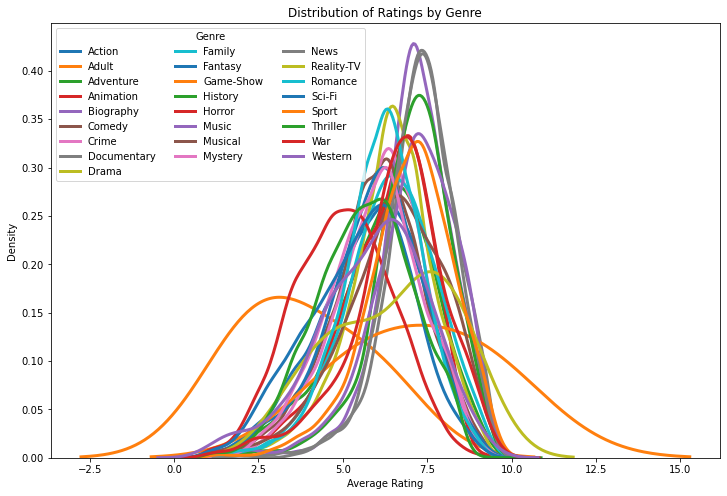

In [24]:
fig, ax = plt.subplots(figsize=(12,8))

for genre in list_of_genre_types:
    # Subset to the genre
    subset = basics_ratings[basics_ratings[genre] == True]
    
    # Draw the density plot
    sns.distplot(subset['averagerating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = genre)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Genre', ncol=3)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Density')

In [25]:
ratings_dict = {}

for genre in list_of_genre_types:
    ratings_dict[genre] = {'average_rating': basics_ratings[basics_ratings[genre] == True]['averagerating'].mean(),
                           'number_movies': len(basics_ratings[basics_ratings[genre] == True])}

# Delete the Short genre because it only has one entry
#del ratings_dict['Short']
# While we're at it, make a separate list_genres so I can still iterate through genres and have 
# it agree with the shorted dict here


In [26]:
ratings_dict

{'Action': {'average_rating': 5.810360618202632, 'number_movies': 6988},
 'Adult': {'average_rating': 3.766666666666667, 'number_movies': 3},
 'Adventure': {'average_rating': 6.196201205134923, 'number_movies': 3817},
 'Animation': {'average_rating': 6.2483075157773955, 'number_movies': 1743},
 'Biography': {'average_rating': 7.1622735626148595, 'number_movies': 3809},
 'Comedy': {'average_rating': 6.0026894158473105, 'number_movies': 17290},
 'Crime': {'average_rating': 6.115441335935806, 'number_movies': 4611},
 'Documentary': {'average_rating': 7.332090350926604, 'number_movies': 17753},
 'Drama': {'average_rating': 6.401559048980123, 'number_movies': 30788},
 'Family': {'average_rating': 6.394724501758499, 'number_movies': 3412},
 'Fantasy': {'average_rating': 5.919473189087488, 'number_movies': 2126},
 'Game-Show': {'average_rating': 7.3, 'number_movies': 2},
 'History': {'average_rating': 7.04095575221239, 'number_movies': 2825},
 'Horror': {'average_rating': 5.003440187646598, '

In [27]:
ratings_dict['Action']['average_rating']

5.810360618202632

In [28]:
ratings = []
num_movies = []

for key, value in ratings_dict.items():
    ratings.append(value['average_rating'])
    num_movies.append(value['number_movies'])


In [29]:
norm = plt.Normalize(min(ratings)-1, max(ratings)+.5)
colors = plt.cm.OrRd(norm(ratings))

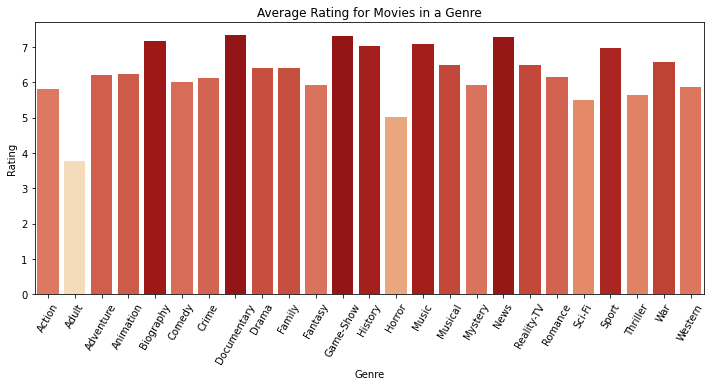

In [30]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(list_of_genre_types, ratings, palette = colors)

ax.tick_params(axis='x', labelrotation = 60)
ax.set_xlabel('Genre')
ax.set_ylabel('Rating')
ax.set_title('Average Rating for Movies in a Genre');

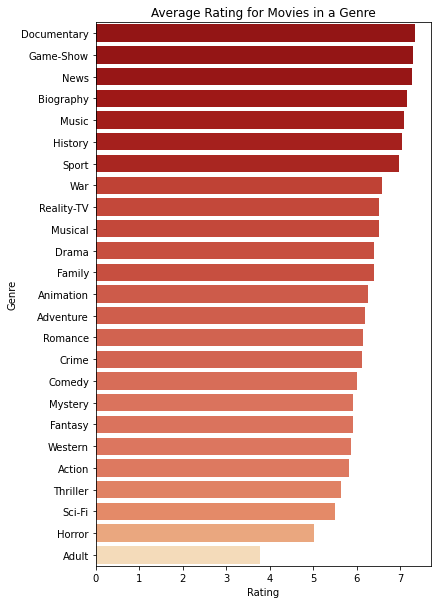

In [31]:
# Lets try ascending to see if it looks better
ratings_dict_sorted = dict(sorted(ratings_dict.items(), key=lambda item: item[1]['average_rating']))


# From new sorted dictionary, make sorted lists for plotting
ratings_sorted = [value['average_rating'] for key, value in ratings_dict_sorted.items()][::-1]
genres_sorted = [key for key, value in ratings_dict_sorted.items()][::-1]

# Normalize colormap for data range
norm = plt.Normalize(min(ratings_sorted)-1, max(ratings_sorted)+.5)
colors = plt.cm.OrRd(norm(ratings_sorted))

# Define plot
fig, ax = plt.subplots(figsize=(6,10))


# Draw plot
sns.barplot(ratings_sorted, genres_sorted, palette = colors, orient='horizonatal')

ax.tick_params(axis='x', labelrotation = 0)
ax.set_xlabel('Rating')
ax.set_ylabel('Genre')
ax.set_title('Average Rating for Movies in a Genre');

In [32]:
ratings_dict_sorted

{'Adult': {'average_rating': 3.766666666666667, 'number_movies': 3},
 'Horror': {'average_rating': 5.003440187646598, 'number_movies': 7674},
 'Sci-Fi': {'average_rating': 5.489755213055305, 'number_movies': 2206},
 'Thriller': {'average_rating': 5.639114031885116, 'number_movies': 8217},
 'Action': {'average_rating': 5.810360618202632, 'number_movies': 6988},
 'Western': {'average_rating': 5.868214285714285, 'number_movies': 280},
 'Fantasy': {'average_rating': 5.919473189087488, 'number_movies': 2126},
 'Mystery': {'average_rating': 5.920401447844685, 'number_movies': 3039},
 'Comedy': {'average_rating': 6.0026894158473105, 'number_movies': 17290},
 'Crime': {'average_rating': 6.115441335935806, 'number_movies': 4611},
 'Romance': {'average_rating': 6.146607983001973, 'number_movies': 6589},
 'Adventure': {'average_rating': 6.196201205134923, 'number_movies': 3817},
 'Animation': {'average_rating': 6.2483075157773955, 'number_movies': 1743},
 'Family': {'average_rating': 6.3947245017

### Compare to how many times movies in each genre were reviewed

In [33]:
ratings_count_dict = {}

for genre in list_of_genre_types:
    ratings_count_dict[genre] = basics_ratings[basics_ratings[genre] == True]['numvotes'].mean()

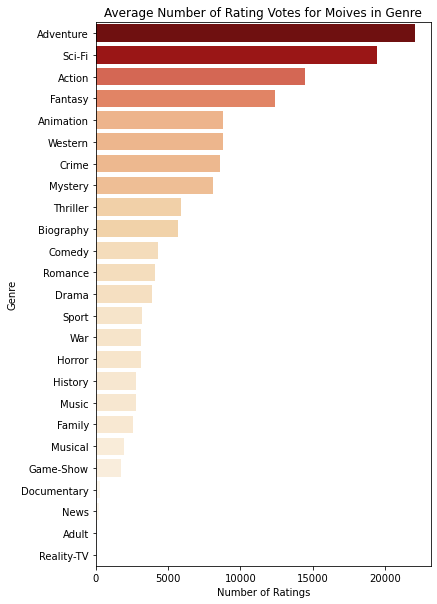

In [34]:
# Lets try ascending to see if it looks better
ratings_count_sorted = dict(sorted(ratings_count_dict.items(), key=lambda item: item[1]))

# From new sorted dictionary, make sorted lists for plotting
ratings_sorted = [value for key, value in ratings_count_sorted.items()][::-1]
genres_sorted = [key for key, value in ratings_count_sorted.items()][::-1]

# Normalize colormap for data range
norm = plt.Normalize(min(ratings_sorted)-1, max(ratings_sorted)+.5)
colors = plt.cm.OrRd(norm(ratings_sorted))

# Define plot
fig, ax = plt.subplots(figsize=(6,10))


# Draw plot
sns.barplot(ratings_sorted, genres_sorted, palette = colors, orient='horizonatal')

ax.tick_params(axis='x', labelrotation = 0)
ax.set_xlabel('Number of Ratings')
ax.set_ylabel('Genre')
ax.set_title('Average Number of Rating Votes for Moives in Genre');

Again.. this is all messed up because movies with 3 genres count their numvotes into 3 categories.
Should I use sum or average here...

## okay....
So all of this must be getting screwed by movies that have 3 genres. The same rating appears in multiple different
distributions, averaging them all out and pulling them close together as you can see in the KDE plot. It is also very possible that certain genres are constantly used together, like biography and documentary. This skews both columns together and higher. Check below on how many Bio and Doc and Bio+Doc movies there are

In [35]:
bios = basics_ratings[basics_ratings['Biography'] == True]['averagerating'].count()
docs = basics_ratings[basics_ratings['Documentary'] == True]['averagerating'].count()
both = basics_ratings[(basics_ratings['Biography'] == True) & (basics_ratings['Documentary'] == True)]['averagerating'].count()
print(f"""
        There are {bios} Biography movies and {docs} Documentaries.
        {both} of those movies  are categorized as both of these genres.
        """)


        There are 3809 Biography movies and 17753 Documentaries.
        2506 of those movies  are categorized as both of these genres.
        


So the Biographies are basically all contained in Docs column too

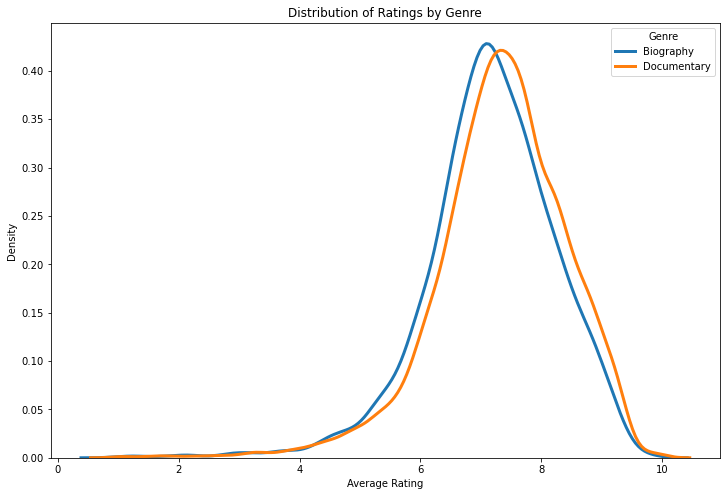

In [36]:
# Idea for cohesive project:
# When I find the biggest grossing genres, examine the ratings of those top sellers as shoen below.
# Here I just picked a top five, replace later

top_five_genres = ['Action', 'Drama', 'Comedy', 'Adventure', 'Thriller']
bio_doc = ['Biography', 'Documentary']

fig, ax = plt.subplots(figsize=(12,8))

for genre in bio_doc:
    # Subset to the genre
    subset = basics_ratings[basics_ratings[genre] == True]
    
    # Draw the density plot
    sns.distplot(subset['averagerating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = genre)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Genre', ncol=1)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Density');

In [37]:
both_biodoc = basics_ratings[(basics_ratings['Biography'] == True) & (basics_ratings['Documentary'] == True)]
just_bio = basics_ratings[(basics_ratings['Biography'] == True) & (basics_ratings['Documentary'] == False)]
just_doc = basics_ratings[(basics_ratings['Biography'] == False) & (basics_ratings['Documentary'] == True)]

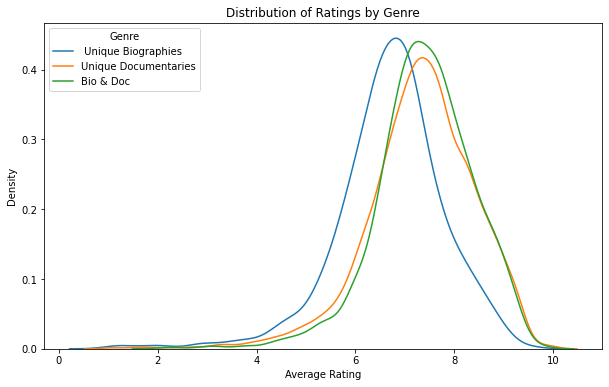

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(just_bio['averagerating'], hist = False, kde = True, label=' Unique Biographies')
sns.distplot(just_doc['averagerating'], hist = False, kde = True, label='Unique Documentaries')
sns.distplot(both_biodoc['averagerating'], hist = False, kde = True, label='Bio & Doc')

plt.legend(prop={'size': 10}, title = 'Genre', ncol=1)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Density');

### Above -> do the same above, but with 3 categories: shared biodoc, unique bios, unique docs.
Then ask lindsey about how how a data scientist would best compare and analyze this. Prefer to have overlap? Or to have separate categories?


# Idea for tomrrow
Compare movies by number of genres associated, eg 3,2,1 
At first I though this was dumb, but if 3 is always higher, it may say something about how
the movies can be marketed wider, and thats good advice for the studio.

In [39]:
label_nums = ['1 Genre', '2 Genres', '3 Genres']

for index, num in enumerate(label_nums):
    basics_ratings[num] = basics_ratings['list_genres'].map(lambda x: True if (len(x) == index+1) else False)

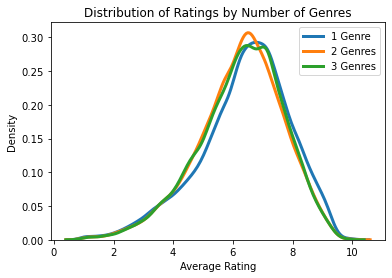

In [40]:
for num in label_nums:
    # Subset to the genre
    subset = basics_ratings[basics_ratings[num] == True]
    
    # Draw the density plot
    sns.distplot(subset['averagerating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = num)
    
# Plot formatting
plt.legend(prop={'size': 10}, ncol=1)
plt.title('Distribution of Ratings by Number of Genres')
plt.xlabel('Average Rating')
plt.ylabel('Density');

#### Can see that number of associated genres doesnt affect how well a movie is rated :(

### Next thing to apply: shinkage estimator to weight ratings based on number of votes

In [41]:
ratings_dict_sorted

{'Adult': {'average_rating': 3.766666666666667, 'number_movies': 3},
 'Horror': {'average_rating': 5.003440187646598, 'number_movies': 7674},
 'Sci-Fi': {'average_rating': 5.489755213055305, 'number_movies': 2206},
 'Thriller': {'average_rating': 5.639114031885116, 'number_movies': 8217},
 'Action': {'average_rating': 5.810360618202632, 'number_movies': 6988},
 'Western': {'average_rating': 5.868214285714285, 'number_movies': 280},
 'Fantasy': {'average_rating': 5.919473189087488, 'number_movies': 2126},
 'Mystery': {'average_rating': 5.920401447844685, 'number_movies': 3039},
 'Comedy': {'average_rating': 6.0026894158473105, 'number_movies': 17290},
 'Crime': {'average_rating': 6.115441335935806, 'number_movies': 4611},
 'Romance': {'average_rating': 6.146607983001973, 'number_movies': 6589},
 'Adventure': {'average_rating': 6.196201205134923, 'number_movies': 3817},
 'Animation': {'average_rating': 6.2483075157773955, 'number_movies': 1743},
 'Family': {'average_rating': 6.3947245017

In [42]:
C = 0
m = 100
summ = []
for key, value in ratings_dict_sorted.items():
    
    summ.append(value['average_rating'])
C = np.mean(summ)

In [43]:
C

6.26662787640471

In [44]:
weight_coeff = []


for key, value in ratings_dict_sorted.items():
    weight_coeff.append(value['number_movies']/(value['number_movies']+m))

original_rating = [value['average_rating'] for key, value in ratings_dict_sorted.items()]
number_movies = [value['number_movies'] for key, value in ratings_dict_sorted.items()]
genre_sorted = [key for key, value in ratings_dict_sorted.items()]
weight_coeff = np.array(weight_coeff)
original_rating = np.array(original_rating)
number_movies = np.array(number_movies)

weighted_rating = (weight_coeff * original_rating) + ((1-weight_coeff) * C)

In [45]:
weighted_rating

array([6.19381347, 5.01968906, 5.5234444 , 5.64665899, 5.8167978 ,
       5.97305997, 5.93506864, 5.93143128, 6.00420718, 6.11865056,
       6.14840227, 6.19799918, 6.24930157, 6.3910771 , 6.40112221,
       6.47011302, 6.30053665, 6.5509578 , 6.90716402, 7.014483  ,
       7.05206131, 7.13936116, 7.12336198, 6.28689007, 7.32612238])

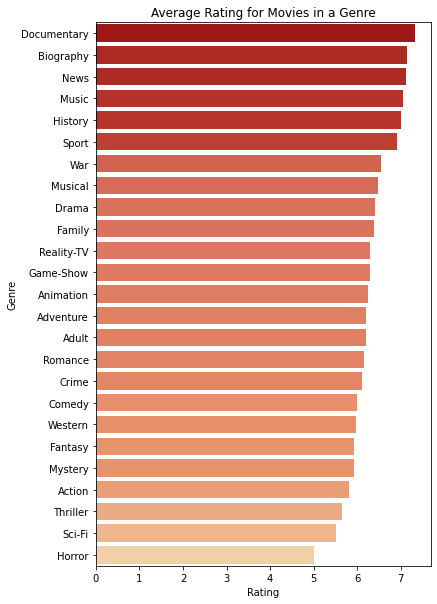

In [46]:
dict_to_sort = {genre_sorted[i]: weighted_rating[i] for i in range(len(weighted_rating))}

sorted_dict = dict(sorted(dict_to_sort.items(), key=lambda item: item[1]))

ratings_sorted = [value for key, value in sorted_dict.items()][::-1]
genres_sorted = [key for key, value in sorted_dict.items()][::-1]

norm = plt.Normalize(min(weighted_rating)-1, max(weighted_rating)+.5)
colors = plt.cm.OrRd(norm(ratings_sorted))


fig, ax = plt.subplots(figsize=(6,10))

sns.barplot(ratings_sorted, genres_sorted, palette = colors, orient='horizonatal')

ax.tick_params(axis='x', labelrotation = 0)
ax.set_xlabel('Rating')
ax.set_ylabel('Genre')
ax.set_title('Average Rating for Movies in a Genre');

This mostly just takes the genres below the cutoff 'm' number of movies and skews them to the mean genre rating. 

## Below this was the incorrect weighting

if I do it again, should do above weighting in the basics_ratings df like below, above was a pain in the ass with naming different arrays

In [47]:
# weighted ratings

# C is average rating across all movies, WR is weighted rating, R is original rating
# p is the weight coefficient, v is the number of votes for that rating, and m is the cutoff number of votes
# WR = p*R + (1-p)*C
# p = v / (v + m)
m = 25000
C = basics_ratings['averagerating'].mean()
basics_ratings['weight_coeff'] = basics_ratings['numvotes']/(basics_ratings['numvotes']+m)
basics_ratings['weighted_rating'] = ((basics_ratings['weight_coeff']*basics_ratings['averagerating'])
                                    + (1-basics_ratings['weight_coeff'])*C)

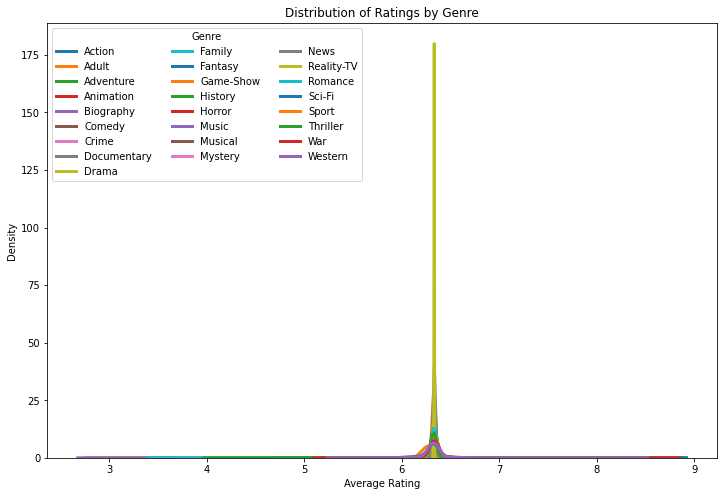

In [48]:


fig, ax = plt.subplots(figsize=(12,8))

for genre in list_of_genre_types:
    # Subset to the genre
    subset = basics_ratings[basics_ratings[genre] == True]
    
    # Draw the density plot
    sns.distplot(subset['weighted_rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = genre)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Genre', ncol=3)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Density');

Well thats a bunch of poopy

In [49]:
weighted_ratings_dict = {}

for genre in list_of_genre_types:
    weighted_ratings_dict[genre] = basics_ratings[basics_ratings[genre] == True]['weighted_rating'].mean()